# W10 Microblog
# Applying logistic regression for classifying human-machine dialogue and human-human dialogue (Part II)

上上週用24個連續變數(continuous variables) (像是Different Words, Sentence Length Average,Function Word proportion...etc) 來分類人人對話及人機對話。這禮拜則嘗試看看用類別變數(categorical variables) 來分類。首先，必須將這些類別變數轉變為dummy variables(虛擬變數)。

In [1]:
from sklearn import preprocessing, linear_model
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
plt.style.use('ggplot')
plt.rcParams['font.family']='SimHei' #⿊體

In [2]:
data = pd.read_excel('sample_50_anno.xlsx',sheet_name = None) 
DAdata=data.get('DA_tp') # get a specific sheet to DataFrame

這次的類別變數是11個dialogue act type。資料還是一樣是上週的100筆人人對話及人機對話(50筆人人，50筆人機)。每組對話都經過我人工標記，屬於哪個dialogue act type就在下面標1，沒有則標0。

下面的資料是dummy後的資料。

In [4]:
df=DAdata[['starter','Inf','Ans','offer','Sug','Req','Chk.Q','Pro.Q','Set.Q','Autopositive','Machine']]
df.head()

,starter,Inf,Ans,offer,Sug,Req,Chk.Q,Pro.Q,Set.Q,Autopositive,Machine
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [5]:
x=df[['starter','Inf','Ans','offer','Sug','Req','Chk.Q','Pro.Q','Set.Q','Autopositive']]
y=df[['Machine']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2021) 

x_train

,starter,Inf,Ans,offer,Sug,Req,Chk.Q,Pro.Q,Set.Q,Autopositive
173,0,1,0,0,0,0,0,0,1,0
112,0,0,0,0,0,0,0,0,1,0
179,0,1,0,0,0,0,0,0,0,0
134,1,0,0,0,0,0,0,0,0,0
180,0,0,0,0,0,0,0,1,0,0
66,0,0,0,0,1,0,0,0,0,0
34,1,0,0,0,0,1,0,0,0,0
169,0,1,0,0,0,0,0,0,0,0
77,1,0,0,0,0,0,0,0,0,0
45,0,0,0,0,0,0,0,0,1,0


In [6]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()

sc.fit(x_train)

x_train_nor=sc.transform(x_train)
x_test_nor=sc.transform(x_test)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


In [7]:
from sklearn.linear_model  import LogisticRegression
import math
lr=LogisticRegression()
lr.fit(x_train_nor,y_train)

# 印出係數
print(lr.coef_)
#印出10個檢定變數的顯著性，以 P-value 是否小於 0.05（信心水準 95%）來判定
print(f_regression(x_train_nor,y_train)[1])
# 印出截距
print(lr.intercept_ )

[[-0.08006139 -0.44116689  0.08343295  0.         -0.45971731 -0.83366503
  -0.22135901 -0.09189166  0.35124534 -0.08632877]]
[0.50361434 0.01848812 0.24974631        nan 0.13953905 0.00446218
 0.27466972 0.8810979  0.00176625 0.95305294]
[-0.00500389]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:299: RuntimeWarning: invalid va

In [8]:
np.round(lr.predict_proba(x_test_nor),3)

array([[0.461, 0.539],
       [0.498, 0.502],
       [0.684, 0.316],
       [0.236, 0.764],
       [0.367, 0.633],
       [0.684, 0.316],
       [0.461, 0.539],
       [0.367, 0.633],
       [0.367, 0.633],
       [0.684, 0.316],
       [0.236, 0.764],
       [0.732, 0.268],
       [0.367, 0.633],
       [0.684, 0.316],
       [0.236, 0.764],
       [0.684, 0.316],
       [0.461, 0.539],
       [0.684, 0.316],
       [0.461, 0.539],
       [0.367, 0.633],
       [0.684, 0.316],
       [0.367, 0.633],
       [0.461, 0.539],
       [0.236, 0.764],
       [0.236, 0.764],
       [0.367, 0.633],
       [0.498, 0.502],
       [0.972, 0.028],
       [0.991, 0.009],
       [0.981, 0.019],
       [0.973, 0.027],
       [0.598, 0.402],
       [0.461, 0.539],
       [0.236, 0.764],
       [0.367, 0.633],
       [0.684, 0.316],
       [0.236, 0.764],
       [0.367, 0.633],
       [0.367, 0.633],
       [0.236, 0.764],
       [0.461, 0.539],
       [0.684, 0.316],
       [0.461, 0.539],
       [0.4

In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [10]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(y_test, lr.predict(x_test_nor))
print('混淆矩陣：', cnf)

混淆矩陣： [[12 20]
 [11 19]]


Confusion matrix, without normalization
[[12 20]
 [11 19]]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['SimHei'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


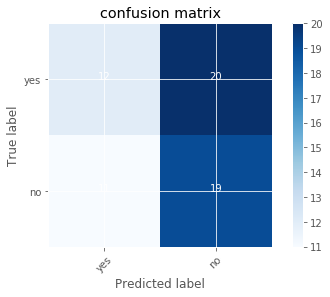

In [11]:
import itertools
target_name=['yes','no']
plot_confusion_matrix(cnf,classes=target_name,title='confusion matrix')
plt.show()

In [17]:
accuracy=(12+19)/(12+19+11+20)
print(accuracy)

0.5


In [13]:
precision=19/39
print(precision)

0.48717948717948717


In [14]:
#覆蓋率或者靈敏度
recall=19/30
print(recall)

0.6333333333333333


In [16]:
F1=0.61709401709/1.12051282051
print(F1)

0.5507246376789607


看來效果沒有上次好......


Reference
* [Scikit-learn——Naive Bayes](https://blog.csdn.net/The_lastest/article/details/78827164)